In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.style.use('ggplot')
plt.rc('font', family='NanumGothic')

# 데이터 구성하기

In [3]:
df = pd.read_csv('../Data/3. Big Data 분석/SCALE불량.csv', encoding='cp949')

In [4]:
df

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1164,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1169,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1163,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1163,940,적용,10,2조


## 결측치 확인

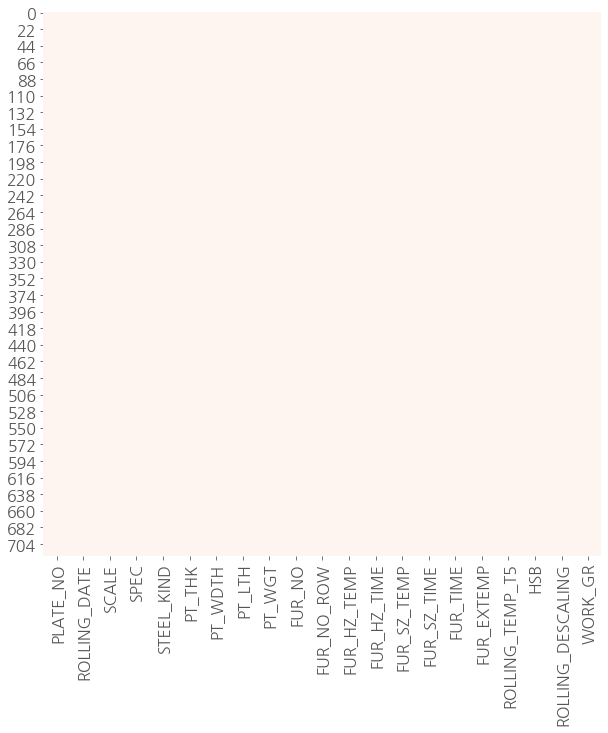

In [5]:
# 결측치 확인
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')

# EDA

In [6]:
# 범주형, 연속형 확인
df.dtypes

PLATE_NO              object
ROLLING_DATE          object
SCALE                 object
SPEC                  object
STEEL_KIND            object
PT_THK               float64
PT_WDTH                int64
PT_LTH                 int64
PT_WGT                 int64
FUR_NO                object
FUR_NO_ROW             int64
FUR_HZ_TEMP            int64
FUR_HZ_TIME            int64
FUR_SZ_TEMP            int64
FUR_SZ_TIME            int64
FUR_TIME               int64
FUR_EXTEMP             int64
ROLLING_TEMP_T5        int64
HSB                   object
ROLLING_DESCALING      int64
WORK_GR               object
dtype: object

In [7]:
# 이산형 변수 숫자로 변환
df['SCALE'] = np.where(df['SCALE'] == '양품', 1, 0)
df['HSB'] = np.where(df['HSB'] == '적용', 1, 0)

In [8]:
df_str = df.select_dtypes(include='object')

In [9]:
df_num = df.select_dtypes(exclude='object')

## 이상치 확인 - 연속형 변수

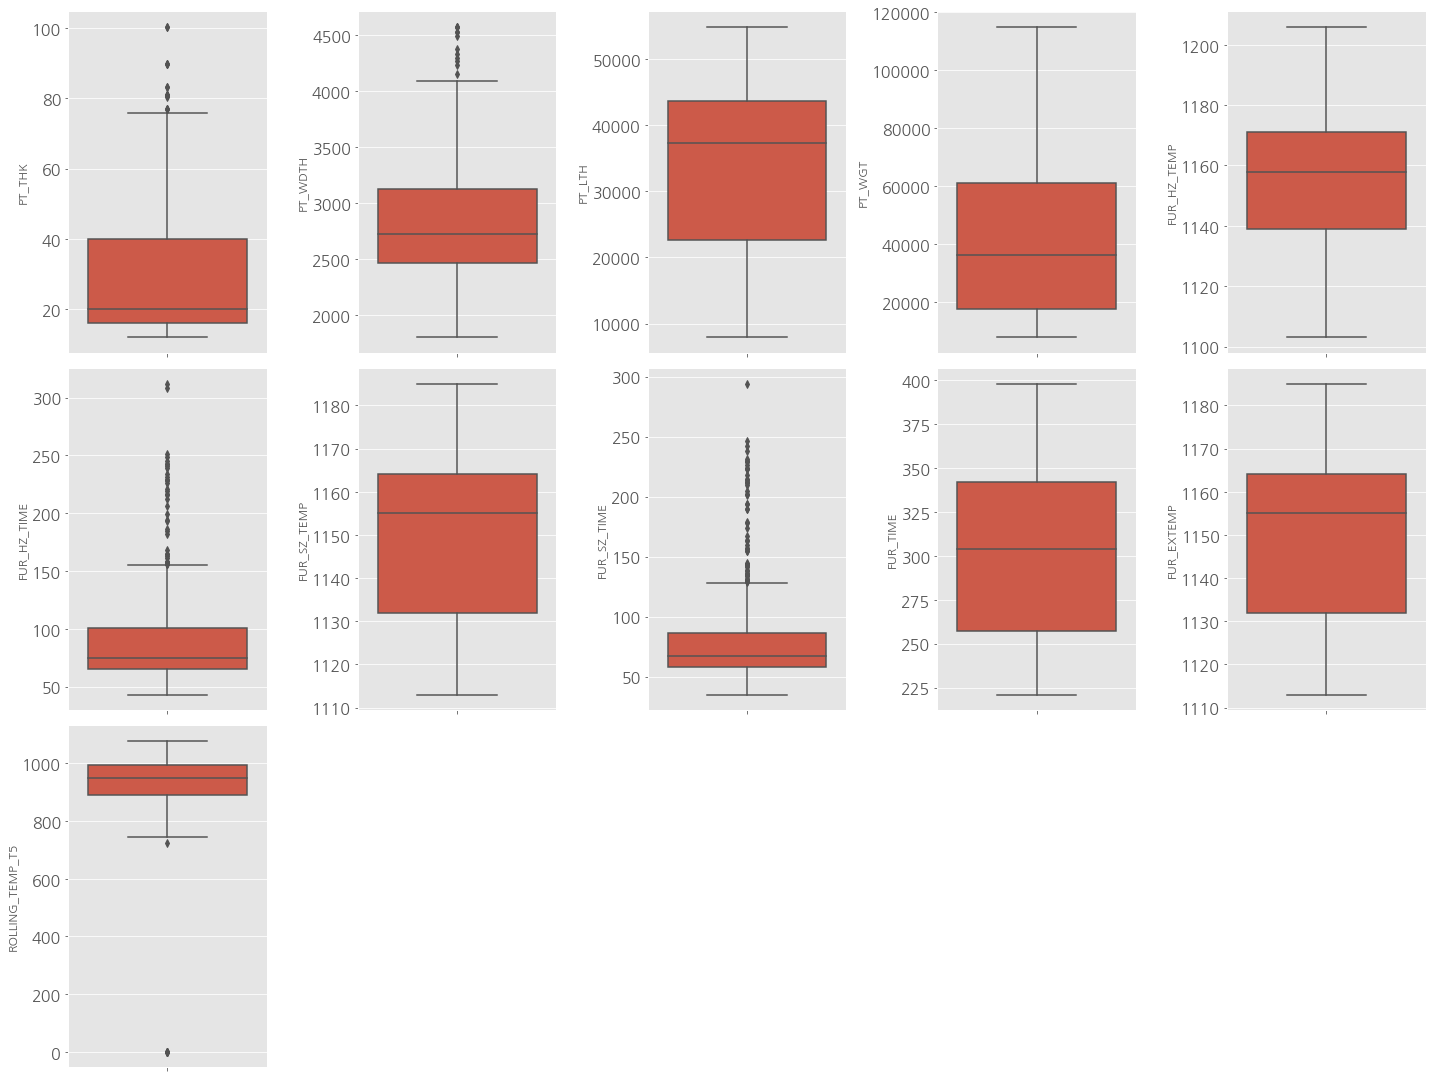

In [10]:
# 컬럼 별 box plot 시각화
plt.figure(figsize=(20,20))
for i, col in enumerate(df_num.columns.drop(['SCALE', 'FUR_NO_ROW', 'ROLLING_DESCALING', 'HSB'])):
    sns.boxplot(data=df_num, y=df_num[col], ax=plt.subplot(4, 5, i+1))
plt.tight_layout()

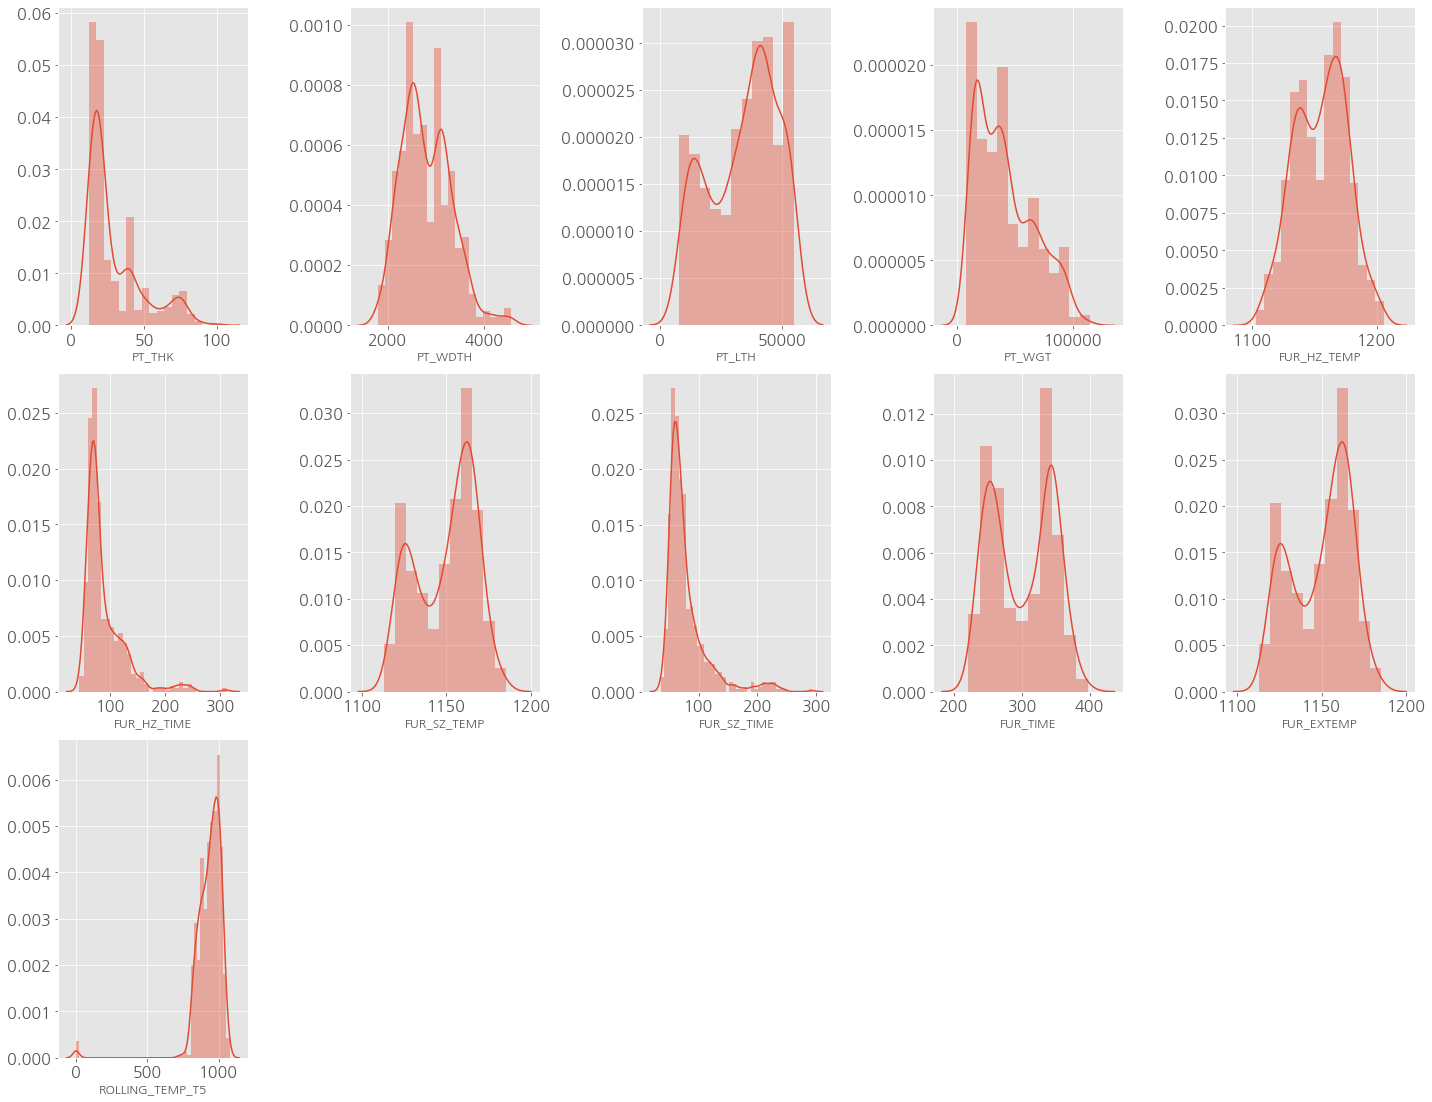

In [11]:
# 컬럼 별 box plot 시각화
plt.figure(figsize=(20,20))
for i, col in enumerate(df_num.columns.drop(['SCALE', 'HSB', 'FUR_NO_ROW', 'ROLLING_DESCALING'])):
    sns.distplot(df[col],ax=plt.subplot(4, 5, i+1))
plt.tight_layout()

## 요약통계량 - 연속형 변수

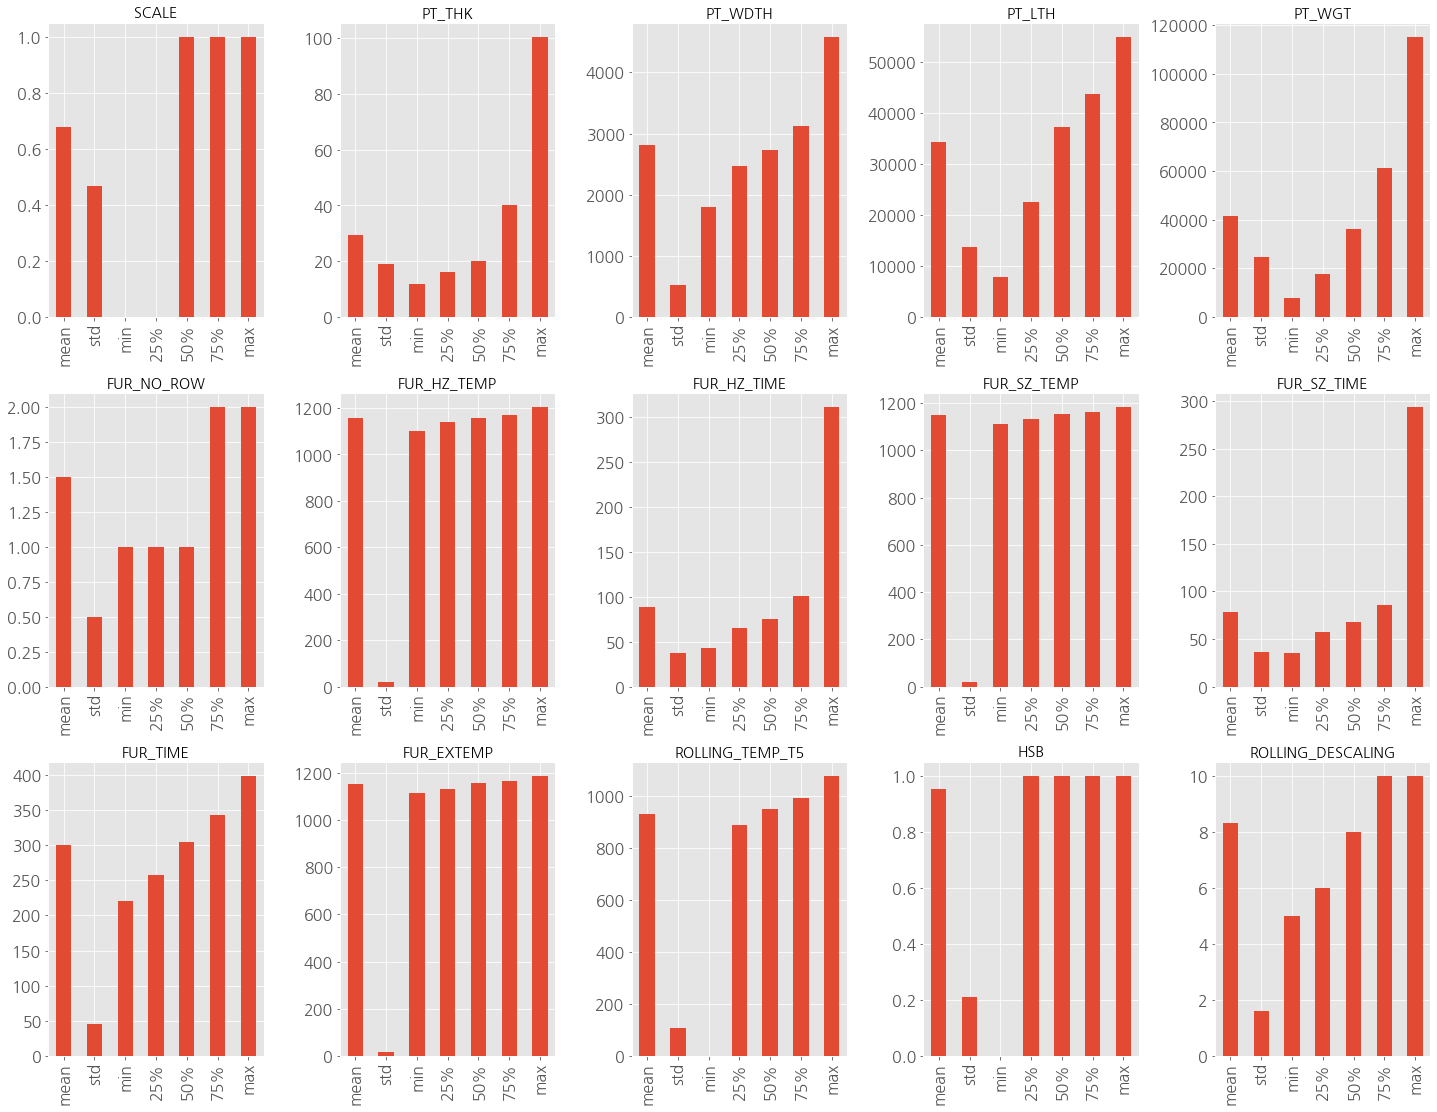

In [12]:
# 컬럼 별 요약 통계량 시각화
plt.figure(figsize=(20,20))
for i, col in enumerate(df_num.columns):
    df[col].describe()[1:].plot(kind='bar', title=col, ax=plt.subplot(4, 5, i+1))
plt.tight_layout()

In [13]:
# ROLLING_TEMP_T5의 최소값이 이상하여 확인 -> 이상치로 판단됨
df_num.sort_values('ROLLING_TEMP_T5').iloc[:20]

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
496,1,40.35,2497,23592,37320,1,1119,109,1117,76,383,1117,0,1,6
495,1,80.82,2085,13176,17430,2,1130,92,1124,61,362,1124,0,1,6
494,1,80.82,2085,12919,17090,1,1133,89,1122,59,378,1122,0,1,6
184,1,16.09,2221,43596,61150,1,1169,64,1164,61,308,1164,0,1,10
185,1,16.09,2221,43596,61150,2,1163,57,1166,67,303,1166,0,1,10
41,1,55.51,3765,11398,37400,2,1132,95,1128,80,341,1128,0,1,6
519,1,13.06,3445,53682,18960,2,1147,73,1129,164,342,1129,723,1,10
448,1,40.35,2511,22669,36060,1,1178,90,1127,138,333,1127,745,1,6
77,1,75.71,2725,9749,15790,2,1123,79,1126,61,291,1126,760,1,6
74,1,73.71,2725,9754,15380,2,1113,96,1122,68,310,1122,773,1,6


1. pt_thk, pt_wgt, fur_hz_time의 75%와 max값의 차이가 상당함
2. fur_hz_temp와 fur_sz_temp는 표준편차가 매우 작음
3. rolling_temp_t5가 0인 행 6개 발견 -> 삭제
4. fur_sz_temp와 fur_extemp가 정확히 일치 -> 삭제

## 범주형 변수

## chi-square test

In [14]:
spec_table = pd.pivot_table(df, index='SPEC', columns='SCALE', values='FUR_NO', aggfunc='count').fillna(0)

In [15]:
chi, pval, dof, expected = stats.chi2_contingency(spec_table)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chisq: 211.322
p: 0.000


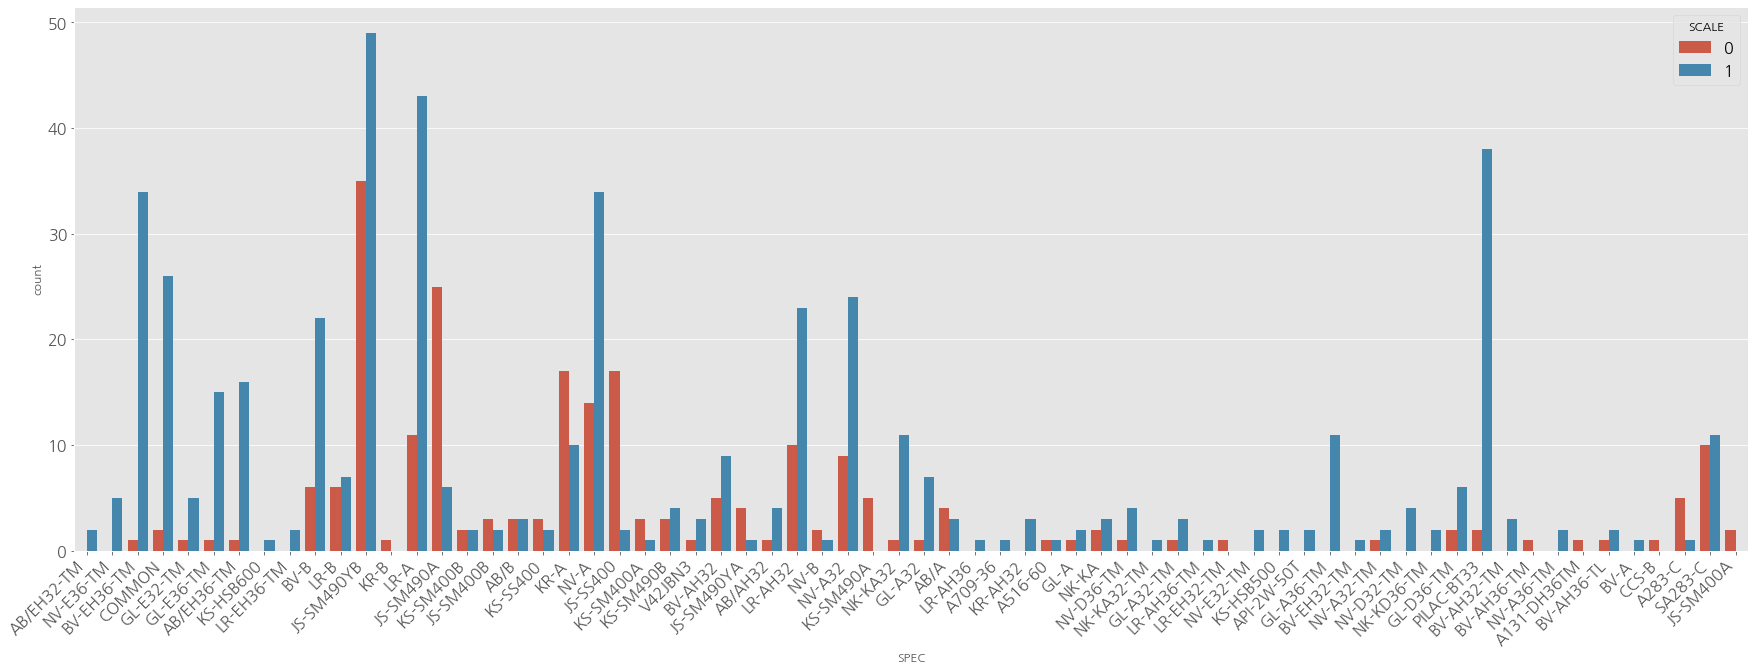

In [16]:
# SPEC 변수에 따른 SCALE 발생빈도 시각화
plt.figure(figsize=(30,10))
g = sns.countplot('SPEC', hue='SCALE', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [17]:
steel_table = pd.pivot_table(df, index='STEEL_KIND', columns='SCALE', values='SPEC', aggfunc='count').fillna(0)

In [18]:
chi, pval, dof, expected = stats.chi2_contingency(steel_table)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chisq: 83.705
p: 0.000


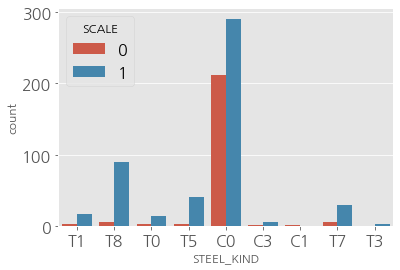

In [19]:
# STEEL_KIND에 따른 SCALE 발생 빈도 시각화
sns.countplot('STEEL_KIND', hue='SCALE', data=df)
plt.show()

In [20]:
fur_table = pd.pivot_table(df, index=['FUR_NO', 'FUR_NO_ROW'], columns='SCALE', values='SPEC', aggfunc='count')

In [21]:
chi, pval, dof, expected = stats.chi2_contingency(fur_table)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chisq: 5.639
p: 0.343


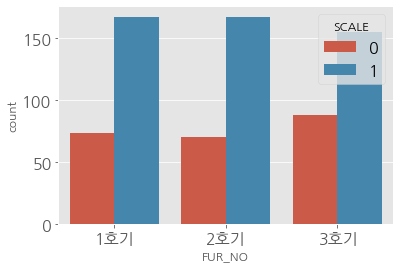

In [22]:
# FUR_NO에 따른 SCALE 발생빈도 시각화
sns.countplot('FUR_NO', hue='SCALE', data=df)
plt.show()

In [23]:
# 각 호기와 라인에 따른 차이를 Pivot
fur_table = pd.pivot_table(df, index=['FUR_NO', 'FUR_NO_ROW'], columns='SCALE', values='SPEC', aggfunc='count')

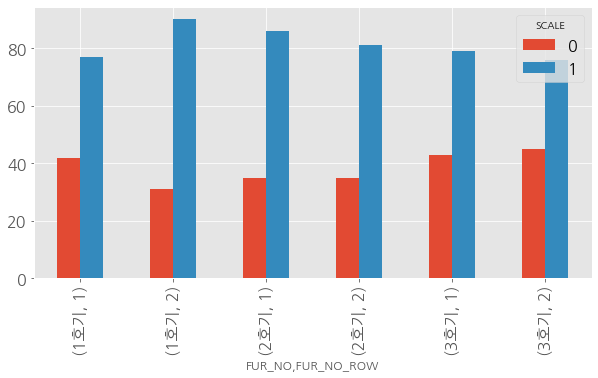

In [24]:
fur_table.plot(kind='bar', figsize=(10,5))

In [25]:
chi, pval, dof, expected = stats.chi2_contingency(fur_table)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chisq: 5.639
p: 0.343


In [26]:
hsb_table = pd.pivot_table(df, index='HSB', columns='SCALE', values='SPEC', aggfunc='count').fillna(0)

In [27]:
chi, pval, dof, expected = stats.chi2_contingency(hsb_table)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chisq: 69.983
p: 0.000


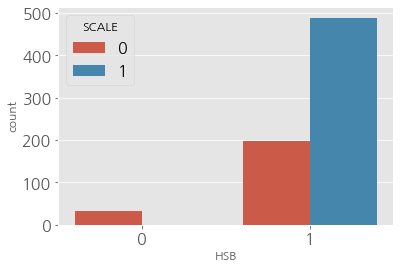

In [28]:
# HSB에 따른 SCALE 발생빈도 시각화
sns.countplot('HSB', hue='SCALE', data=df)
plt.show()

In [29]:
work_table = pd.pivot_table(df, index='WORK_GR', columns='SCALE', values='SPEC', aggfunc='count')

In [30]:
chi, pval, dof, expected = stats.chi2_contingency(work_table)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chisq: 2.953
p: 0.399


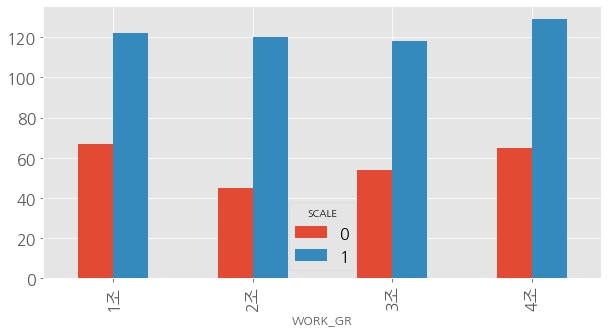

In [31]:
work_table.plot(kind='bar', figsize=(10,5))

1. PLATE_NO, ROLLING_DATE는 의미가 없는 변수이므로 삭제
2. FUR_NO와 FUR_NO_ROW에 따른 SCALE의 차이가 존재하는지 확인하기 위해 카이제곱 test를 진행한 결과 p-value가 0.343으로 차이가 없다고 볼 수 있다.  
3. WORK_GR과 SCALE의 차이가 존재하는지 확인하기 위해 카이제곱 test를 진행한 결과 p-value가 0.399로 차이가 없다고 볼 수 있다.
4. FUR_NO, FUR_NO_ROW, WORK_GR은 삭제한다.

# 전처리

In [32]:
# 불필요한 행 삭제
df = df.drop(['PLATE_NO', 'ROLLING_DATE', 'WORK_GR', 'FUR_NO', 'FUR_NO_ROW', 'FUR_EXTEMP'], axis=1)

In [33]:
# ROLLING_TEMP_T5가 0인 행 삭제
df = df.loc[df['ROLLING_TEMP_T5'] != 0].reset_index(drop=True)

In [34]:
df_dummy = pd.get_dummies(df)

In [35]:
x = df_dummy.drop('SCALE', axis=1)
y = df_dummy['SCALE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1004, stratify=y)

In [36]:
print(f'x_train size: {x_train.shape}')
print(f'x_test size: {x_test.shape}')

x_train size: (499, 87)
x_test size: (215, 87)


## 다중공선성

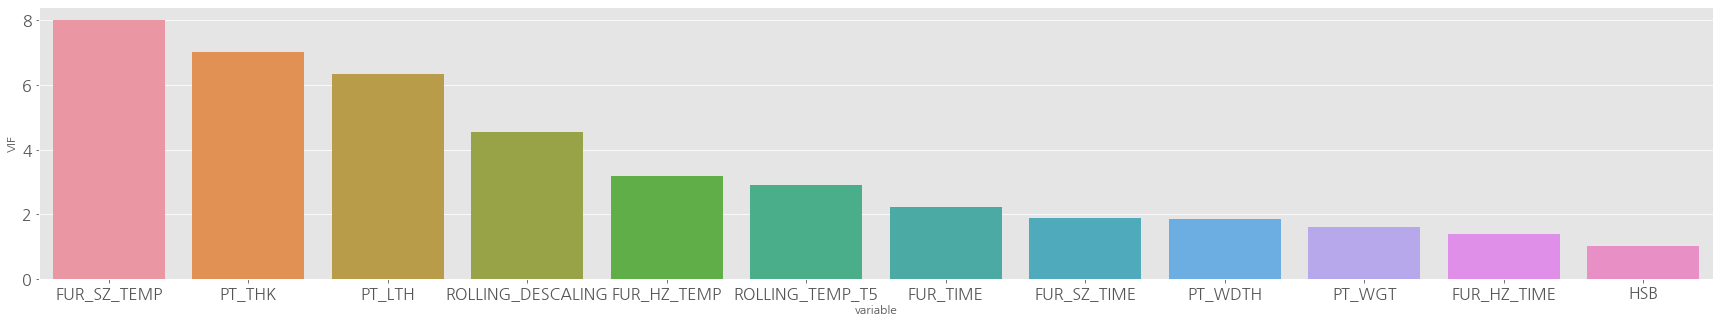

In [37]:
# 다중공선성 확인
x=df.drop(["SCALE",'SPEC','STEEL_KIND'],axis=1)
x_const=sm.add_constant(x)

vif=pd.DataFrame()
vif["variable"]=x_const.columns
vif["VIF"]=[variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]

vif.sort_values("VIF", inplace=True, ascending=False)

plt.figure(figsize=(30,5))
sns.barplot(x='variable', y='VIF', data=vif.iloc[1:])

# 모델 생성

In [38]:
# 기본모델 생성
lr = LogisticRegression(solver='liblinear')
dt = DecisionTreeClassifier(random_state=1004)
rf = RandomForestClassifier(random_state=1004)
gb = GradientBoostingClassifier(random_state=1004)

In [39]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1004, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
lr_train_score = accuracy_score(y_train, lr.predict(x_train)).round(3)
dt_train_score = accuracy_score(y_train, dt.predict(x_train)).round(3)
gb_train_score = accuracy_score(y_train, gb.predict(x_train)).round(3)
rf_train_score = accuracy_score(y_train, rf.predict(x_train)).round(3)

lr_test_score = accuracy_score(y_test, lr.predict(x_test)).round(3)
dt_test_score = accuracy_score(y_test, dt.predict(x_test)).round(3)
gb_test_score = accuracy_score(y_test, gb.predict(x_test)).round(3)
rf_test_score = accuracy_score(y_test, rf.predict(x_test)).round(3)

In [41]:
score_df = pd.DataFrame({'test':[lr_test_score, dt_test_score, gb_test_score, rf_test_score],
                         'train':[lr_train_score, dt_train_score, gb_train_score, rf_train_score]},
                          index=['LogisticRegression', 'DecisionTree', 'GradientBoosting', 'RandomForest'])

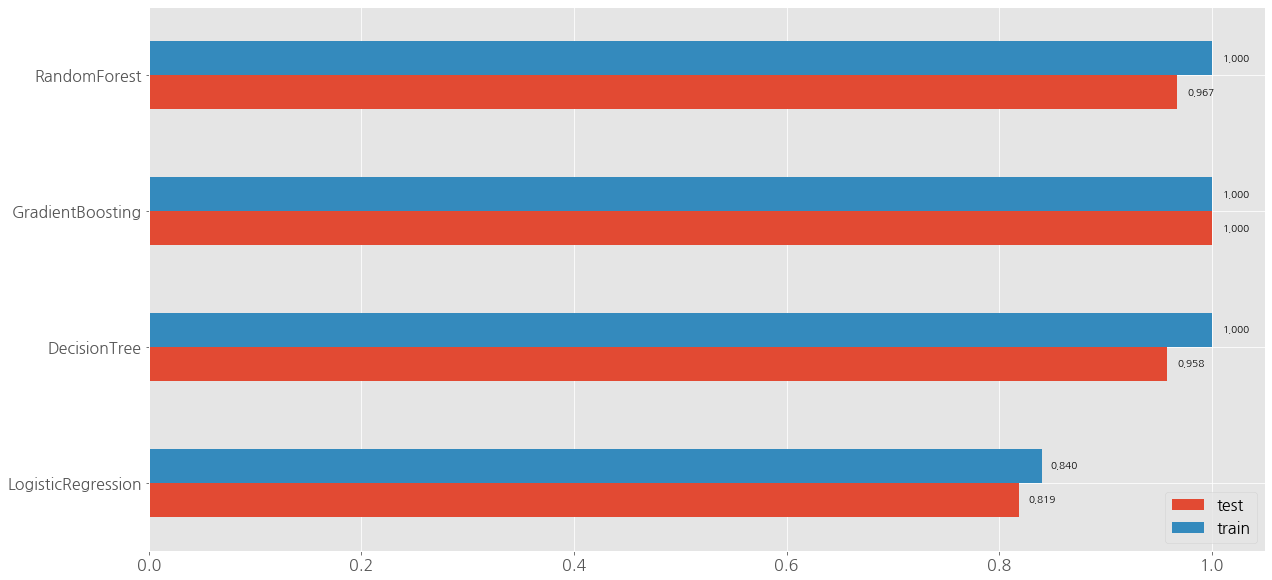

In [42]:
ax = score_df.plot(kind='barh', figsize=(20,10))

for p in ax.patches: 
    x, y, width, height = p.get_bbox().bounds 
    ax.text(width*1.01, y+height/2, "%.3f"%(width), va='center')

# 모델 개선

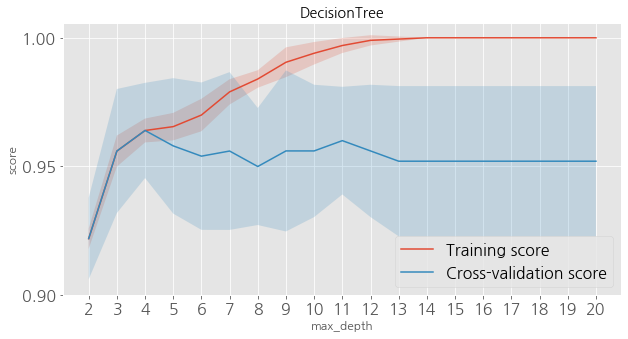

In [43]:
train_scores, test_scores = validation_curve(dt, x_train, y_train, param_name='max_depth', param_range=[i for i in range(2,21)])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot([i for i in range(2,21)], train_scores_mean, label="Training score")
plt.fill_between([i for i in range(2,21)], train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot([i for i in range(2,21)], test_scores_mean, label="Cross-validation score")
plt.fill_between([i for i in range(2,21)], test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)

plt.ylabel('score')
plt.yticks([i / 100 for i in range(90, 101, 5)])
plt.xlabel('max_depth')
plt.xticks([i for i in range(2,21)])

plt.legend(loc="best")
plt.title('DecisionTree')
plt.show()

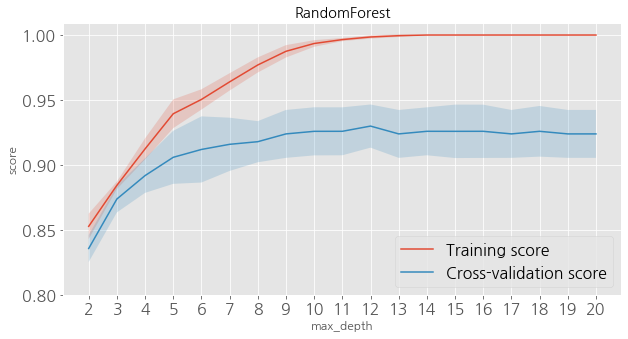

In [44]:
train_scores, test_scores = validation_curve(rf, x_train, y_train, param_name='max_depth', param_range=[i for i in range(2,21)])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot([i for i in range(2,21)], train_scores_mean, label="Training score")
plt.fill_between([i for i in range(2,21)], train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot([i for i in range(2,21)], test_scores_mean, label="Cross-validation score")
plt.fill_between([i for i in range(2,21)], test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)

plt.ylabel('score')
plt.yticks([i / 100 for i in range(80, 101, 5)])
plt.xlabel('max_depth')
plt.xticks([i for i in range(2,21)])

plt.legend(loc="best")
plt.title('RandomForest')
plt.show()

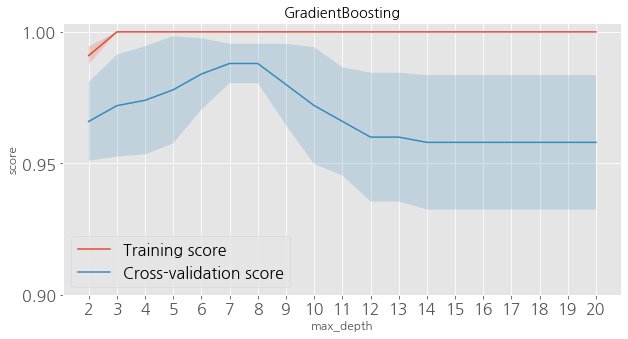

In [45]:
train_scores, test_scores = validation_curve(gb, x_train, y_train, param_name='max_depth', param_range=[i for i in range(2,21)])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot([i for i in range(2,21)], train_scores_mean, label="Training score")
plt.fill_between([i for i in range(2,21)], train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot([i for i in range(2,21)], test_scores_mean, label="Cross-validation score")
plt.fill_between([i for i in range(2,21)], test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)

plt.ylabel('score')
plt.yticks([i / 100 for i in range(90, 101, 5)])
plt.xlabel('max_depth')
plt.xticks([i for i in range(2,21)])

plt.legend(loc="best")
plt.title('GradientBoosting')
plt.show()

그래디언트 부스팅 모델의 depth가 7~8일 때 분산이 제일 작고, 성능도 가장 좋다.

# 최종 평가

In [46]:
gb_final = GradientBoostingClassifier(random_state=1004, max_depth=7)

In [47]:
gb_final.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1004, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [48]:
final_train_score = accuracy_score(y_train, gb_final.predict(x_train)).round(3)
final_test_score = accuracy_score(y_test, gb_final.predict(x_test)).round(3)

In [49]:
score_df = pd.DataFrame({'accuracy_score':[final_test_score, final_train_score]}, 
                        index=['test', 'train'])

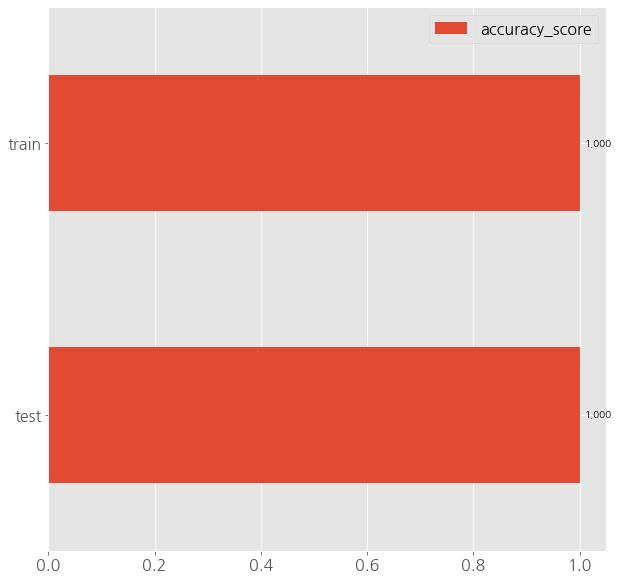

In [50]:
ax = score_df.plot(kind='barh', figsize=(10,10))

for p in ax.patches: 
    x, y, width, height = p.get_bbox().bounds 
    ax.text(width*1.01, y+height/2, "%.3f"%(width), va='center')

In [51]:
v_feature_name = x_train.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)

In [52]:
# 변수 중요도의 편차가 매우 심하여 상위 5개만 추출하여 정확도 비교 예정
df_importance

,Feature,Importance
9,ROLLING_TEMP_T5,0.511376
10,HSB,0.163301
6,FUR_SZ_TEMP,0.130101
11,ROLLING_DESCALING,0.116027
0,PT_THK,0.041913
...,...,...
48,SPEC_KS-HSB500,0.000000
49,SPEC_KS-HSB600,0.000000
50,SPEC_KS-SM400A,0.000000
52,SPEC_KS-SM490A,0.000000


In [53]:
# 변수 중요도가 높은 5개의 변수로 모델 학습
gb_final.fit(x_train[['ROLLING_TEMP_T5', 'HSB', 'FUR_SZ_TEMP', 'ROLLING_DESCALING', 'PT_THK']], y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1004, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
final_train_score = accuracy_score(y_train, gb_final.predict(x_train[['ROLLING_TEMP_T5', 'HSB', 'FUR_SZ_TEMP', 'ROLLING_DESCALING', 'PT_THK']])).round(3)
final_test_score = accuracy_score(y_test, gb_final.predict(x_test[['ROLLING_TEMP_T5', 'HSB', 'FUR_SZ_TEMP', 'ROLLING_DESCALING', 'PT_THK']])).round(3)

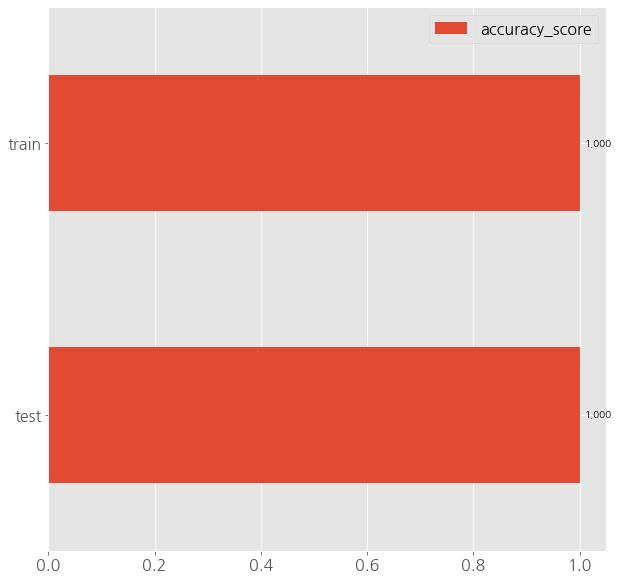

In [55]:
ax = score_df.plot(kind='barh', figsize=(10,10))

for p in ax.patches: 
    x, y, width, height = p.get_bbox().bounds 
    ax.text(width*1.01, y+height/2, "%.3f"%(width), va='center')

최종 모델의 변수 중요도 5개만 추출하여 학습하여도 결과는 동일하다.